In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
dataset = dataset.drop("User ID", axis = 1)
dataset = pd.get_dummies(dataset, drop_first = True, dtype = int)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [3]:
independent = dataset.drop(columns = ['Purchased'])
dependent = dataset[['Purchased']]
dependent.value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(independent)

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0) 
x_train, x_test, y_train, y_test

(     Age  EstimatedSalary  Gender_Male
 92    26            15000            1
 223   60           102000            1
 234   38           112000            0
 232   40           107000            1
 377   42            53000            0
 ..   ...              ...          ...
 323   48            30000            0
 192   29            43000            1
 117   36            52000            1
 47    27            54000            0
 172   26           118000            0
 
 [280 rows x 3 columns],
      Age  EstimatedSalary  Gender_Male
 132   30            87000            1
 309   38            50000            0
 341   35            75000            1
 196   30            79000            0
 246   35            50000            0
 ..   ...              ...          ...
 216   49            65000            1
 259   45           131000            0
 49    31            89000            0
 238   46            82000            0
 343   47            51000            0
 
 [120 rows 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':['gini','entropy'],
    'max_features': ['auto','sqrt','log2'],
    'splitter':['best','random']
}

grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    refit = True, 
    cv=5,              
    scoring='f1_weighted',  
    n_jobs=-1            
)

grid.fit(x_train, y_train)
print(grid.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'random'}


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

y_prob = best_model.predict_proba(x_test)[:, 1]
roc_auc = float(roc_auc_score(y_test, y_prob))
print(f"\nROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.92

Confusion Matrix:
 [[74  5]
 [ 5 36]]

ROC-AUC Score: 0.91


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

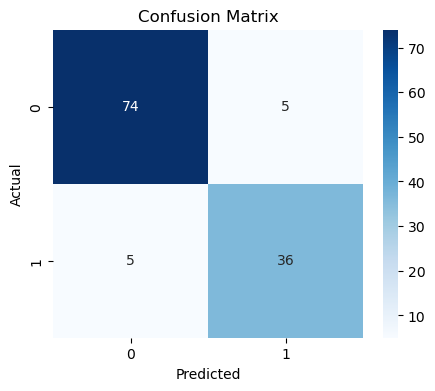

In [12]:
# ---------------------------------------------------------
# Confusion Matrix Heatmap
# ---------------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

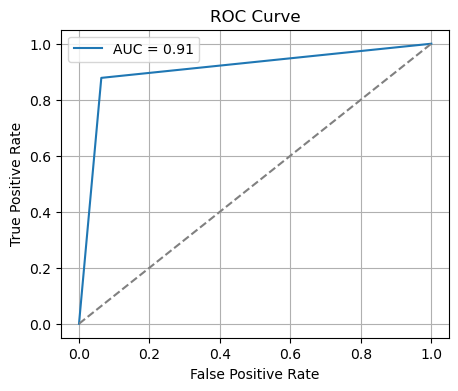

In [13]:
# ---------------------------------------------------------
# ROC Curve
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
input = [[32, 85000, 0]]   # Age, Salary, gender
prediction = best_model.predict(input)
print("Sample Input:", input)
print("Predicted Output:", prediction[0])

Sample Input: [[32, 85000, 0]]
Predicted Output: 0
